In [50]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
 

In [51]:
#Read the dataset
data=pd.read_csv('NYTS16_22_NaN.csv')
 
#Display the first five rows
print(data.head())

   Unnamed: 0  Year  Gender  Grade_of_Student  E_Cig_Ever_Used  \
0           0  2022     2.0               2.0              2.0   
1           1  2022     2.0               2.0              2.0   
2           2  2022     1.0               2.0              2.0   
3           3  2022     1.0               2.0              2.0   
4           4  2022     1.0               2.0              1.0   

   E_Cig_Days_Used  E_Cig_Last_Used  E_Cig_Curiousity  E_Cig_Try  \
0             -1.0             -1.0               4.0        4.0   
1             -1.0             -1.0               3.0        2.0   
2             -1.0             -1.0               4.0        4.0   
3             -1.0             -1.0               3.0        3.0   
4             30.0              0.0               0.0        0.0   

   E_Cig_Try_Next_Year  ...  Cigarette_Curiosity  Cigarette_Try  \
0                  4.0  ...                  4.0            4.0   
1                  3.0  ...                  4.0            

In [52]:
data.groupby('E_Cig_Ever_Used').count()

,Unnamed: 0,Year,Gender,Grade_of_Student,E_Cig_Days_Used,E_Cig_Last_Used,E_Cig_Curiousity,E_Cig_Try,E_Cig_Try_Next_Year,Cigarette_Ever_Used,...,Cigarette_Curiosity,Cigarette_Try,Cigarette_Try_Next_Year,The_Real_Cost,Any_Tobacco_Craving,Attempt_Quitting_Tobacco,Are_Tobacco_Products_Harmful,E_Cig_Promotions_Internet,Tobacco_Promotions_Internet,Cigarette_Last_Used
E_Cig_Ever_Used,,,,,,,,,,,,,,,,,,,,,
1.0,26385,26385,26218,26319,26122,26385,26385,26385,26385,26318,...,26320,26297,24362,21058,19203,20079,20716,24892,20430,23141
2.0,94515,94515,93963,94263,94515,94515,93993,94135,94069,94288,...,94155,94092,79472,76638,45288,94515,75588,90579,74708,93304


In [53]:

#data = data.drop(subset=['The_Real_Cost'])
data = data.drop(labels = ['Attempt_Quitting_Tobacco','Any_Tobacco_Craving','Cigarette_Try_Next_Year'], axis = 1)
data = data.dropna(subset = ['Grade_of_Student', 'The_Real_Cost', 'Tobacco_Promotions_Internet'])
data = data.dropna()

print(data.isnull().sum())

Unnamed: 0                      0
Year                            0
Gender                          0
Grade_of_Student                0
E_Cig_Ever_Used                 0
E_Cig_Days_Used                 0
E_Cig_Last_Used                 0
E_Cig_Curiousity                0
E_Cig_Try                       0
E_Cig_Try_Next_Year             0
Cigarette_Ever_Used             0
Cigarette_Days_Used             0
Cigarette_Curiosity             0
Cigarette_Try                   0
The_Real_Cost                   0
Are_Tobacco_Products_Harmful    0
E_Cig_Promotions_Internet       0
Tobacco_Promotions_Internet     0
Cigarette_Last_Used             0
dtype: int64


In [54]:
#Check data types
data.dtypes

Unnamed: 0                        int64
Year                              int64
Gender                          float64
Grade_of_Student                float64
E_Cig_Ever_Used                 float64
E_Cig_Days_Used                 float64
E_Cig_Last_Used                 float64
E_Cig_Curiousity                float64
E_Cig_Try                       float64
E_Cig_Try_Next_Year             float64
Cigarette_Ever_Used             float64
Cigarette_Days_Used             float64
Cigarette_Curiosity             float64
Cigarette_Try                   float64
The_Real_Cost                   float64
Are_Tobacco_Products_Harmful    float64
E_Cig_Promotions_Internet       float64
Tobacco_Promotions_Internet     float64
Cigarette_Last_Used             float64
dtype: object

In [55]:
def label_encoder(y):
    le = LabelEncoder()
    data[y] = le.fit_transform(data[y])
 
label_list = ["Gender","Grade_of_Student", "E_Cig_Ever_Used","E_Cig_Days_Used","E_Cig_Curiousity", 
              "E_Cig_Try","E_Cig_Try_Next_Year","Cigarette_Ever_Used","Cigarette_Days_Used","Cigarette_Curiosity",
              "Cigarette_Try","The_Real_Cost",
              "Are_Tobacco_Products_Harmful","E_Cig_Promotions_Internet","Tobacco_Promotions_Internet","Cigarette_Last_Used"]
 
for l in label_list:
    label_encoder(l)
 
#Display transformed data
data.head()

,Unnamed: 0,Year,Gender,Grade_of_Student,E_Cig_Ever_Used,E_Cig_Days_Used,E_Cig_Last_Used,E_Cig_Curiousity,E_Cig_Try,E_Cig_Try_Next_Year,Cigarette_Ever_Used,Cigarette_Days_Used,Cigarette_Curiosity,Cigarette_Try,The_Real_Cost,Are_Tobacco_Products_Harmful,E_Cig_Promotions_Internet,Tobacco_Promotions_Internet,Cigarette_Last_Used
0,0,2022,1,1,1,0,-1.0,4,4,4,1,0,4,4,2,1,2,2,0
1,1,2022,1,1,1,0,-1.0,3,2,3,1,0,4,4,0,1,4,4,0
2,2,2022,0,1,1,0,-1.0,4,4,4,1,0,4,4,1,3,1,1,0
5,5,2022,0,0,1,0,-1.0,4,4,4,1,0,4,4,1,0,2,1,0
7,7,2022,0,4,1,0,-1.0,4,4,4,1,0,4,4,2,3,5,5,0


In [56]:
#Divide the dataset into independent and dependent variables
X = data.drop(["E_Cig_Ever_Used", "E_Cig_Days_Used","E_Cig_Curiousity", 
              "E_Cig_Try","E_Cig_Try_Next_Year"],axis=1)
y = data['E_Cig_Ever_Used']
 
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 
 
#Data was splitted as 80% train data and 20% test data.
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (70197, 14)
X_test shape: (17550, 14)
y_train shape: (70197, 1)
y_test shape: (17550, 1)


In [57]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

In [59]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Train Score: 1.0
Test Score: 1.0


In [60]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

In [61]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Train Score: 0.9998717877690739
Test Score: 0.9998290598290598


In [62]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

In [63]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Train Score: 0.9999430168989967
Test Score: 0.9998860398860399


In [64]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

In [65]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 1.0
Test Score: 1.0


In [66]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

In [67]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Train Score: 1.0
Test Score: 1.0


In [68]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

In [69]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Train Score: 1.0
Test Score: 1.0


c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhoom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

In [71]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,1.000000
KNN Train Score,0.999872
SVM Train Score,0.999943
Decision Tree Train Score,1.000000
Random Forest Train Score,1.000000
Gaussian NB Train Score,1.000000


In [72]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,1.000000
KNN Test Score,0.999829
SVM Test Score,0.999886
Decision Tree Test Score,1.000000
Random Forest Test Score,1.000000
Gaussian NB Test Score,1.000000


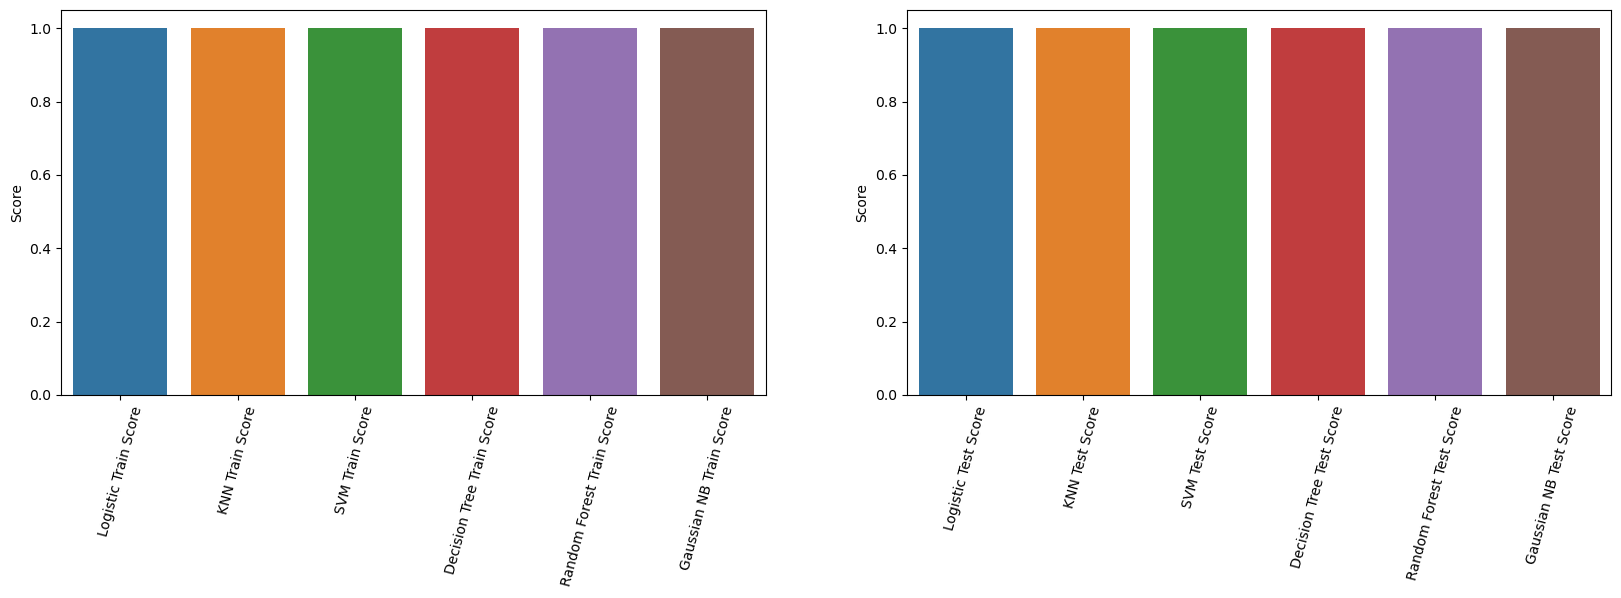

In [73]:
import seaborn as sns
 
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()